## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.14127 | train_mse: 1.53768 | train_mae: 0.87667 |  0:00:01s


epoch 1  | loss: 0.37053 | train_mse: 0.38166 | train_mae: 0.50133 |  0:00:01s


epoch 2  | loss: 0.30811 | train_mse: 0.24638 | train_mae: 0.3786  |  0:00:02s


epoch 3  | loss: 0.26159 | train_mse: 0.18193 | train_mae: 0.32542 |  0:00:02s


epoch 4  | loss: 0.22564 | train_mse: 0.2115  | train_mae: 0.36112 |  0:00:03s


epoch 5  | loss: 0.17574 | train_mse: 0.14899 | train_mae: 0.28666 |  0:00:03s


epoch 6  | loss: 0.16951 | train_mse: 0.12477 | train_mae: 0.27244 |  0:00:04s


epoch 7  | loss: 0.14255 | train_mse: 0.10142 | train_mae: 0.24151 |  0:00:04s


epoch 8  | loss: 0.12662 | train_mse: 0.10271 | train_mae: 0.2392  |  0:00:05s


epoch 9  | loss: 0.12979 | train_mse: 0.08756 | train_mae: 0.22333 |  0:00:05s


epoch 10 | loss: 0.10712 | train_mse: 0.09545 | train_mae: 0.23372 |  0:00:06s


epoch 11 | loss: 0.10932 | train_mse: 0.0869  | train_mae: 0.22249 |  0:00:07s


epoch 12 | loss: 0.11715 | train_mse: 0.08068 | train_mae: 0.21139 |  0:00:07s


epoch 13 | loss: 0.11529 | train_mse: 0.09325 | train_mae: 0.23092 |  0:00:08s


epoch 14 | loss: 0.10858 | train_mse: 0.08375 | train_mae: 0.20343 |  0:00:08s


epoch 15 | loss: 0.10739 | train_mse: 0.05272 | train_mae: 0.17337 |  0:00:09s


epoch 16 | loss: 0.1155  | train_mse: 0.05768 | train_mae: 0.18232 |  0:00:09s


epoch 17 | loss: 0.08969 | train_mse: 0.05932 | train_mae: 0.18071 |  0:00:10s


epoch 18 | loss: 0.09897 | train_mse: 0.08664 | train_mae: 0.21815 |  0:00:10s


epoch 19 | loss: 0.08807 | train_mse: 0.06231 | train_mae: 0.18473 |  0:00:11s


epoch 20 | loss: 0.0844  | train_mse: 0.05605 | train_mae: 0.1774  |  0:00:12s


epoch 21 | loss: 0.07992 | train_mse: 0.05653 | train_mae: 0.17668 |  0:00:12s


epoch 22 | loss: 0.09238 | train_mse: 0.06225 | train_mae: 0.19073 |  0:00:13s


epoch 23 | loss: 0.08745 | train_mse: 0.06468 | train_mae: 0.19557 |  0:00:13s


epoch 24 | loss: 0.0833  | train_mse: 0.05533 | train_mae: 0.18249 |  0:00:14s


epoch 25 | loss: 0.08472 | train_mse: 0.0576  | train_mae: 0.18513 |  0:00:14s


epoch 26 | loss: 0.09958 | train_mse: 0.04825 | train_mae: 0.16381 |  0:00:15s


epoch 27 | loss: 0.08549 | train_mse: 0.04597 | train_mae: 0.15694 |  0:00:15s


epoch 28 | loss: 0.09189 | train_mse: 0.06664 | train_mae: 0.1915  |  0:00:16s


epoch 29 | loss: 0.1064  | train_mse: 0.0427  | train_mae: 0.15241 |  0:00:16s


epoch 30 | loss: 0.10079 | train_mse: 0.0547  | train_mae: 0.17941 |  0:00:17s


epoch 31 | loss: 0.07669 | train_mse: 0.0397  | train_mae: 0.14296 |  0:00:17s


epoch 32 | loss: 0.06891 | train_mse: 0.04396 | train_mae: 0.16568 |  0:00:18s


epoch 33 | loss: 0.07068 | train_mse: 0.03424 | train_mae: 0.13032 |  0:00:19s


epoch 34 | loss: 0.06171 | train_mse: 0.03926 | train_mae: 0.1331  |  0:00:19s


epoch 35 | loss: 0.06931 | train_mse: 0.03592 | train_mae: 0.12955 |  0:00:20s


epoch 36 | loss: 0.06086 | train_mse: 0.04401 | train_mae: 0.15632 |  0:00:20s


epoch 37 | loss: 0.07957 | train_mse: 0.05111 | train_mae: 0.1518  |  0:00:21s


epoch 38 | loss: 0.08398 | train_mse: 0.04973 | train_mae: 0.16008 |  0:00:21s


epoch 39 | loss: 0.0921  | train_mse: 0.06609 | train_mae: 0.19181 |  0:00:22s


epoch 40 | loss: 0.095   | train_mse: 0.04332 | train_mae: 0.1557  |  0:00:22s


epoch 41 | loss: 0.10848 | train_mse: 0.04819 | train_mae: 0.15921 |  0:00:23s


epoch 42 | loss: 0.07428 | train_mse: 0.02627 | train_mae: 0.11952 |  0:00:24s


epoch 43 | loss: 0.0742  | train_mse: 0.04625 | train_mae: 0.13184 |  0:00:24s


epoch 44 | loss: 0.09684 | train_mse: 0.03369 | train_mae: 0.14313 |  0:00:25s


epoch 45 | loss: 0.08699 | train_mse: 0.04466 | train_mae: 0.14755 |  0:00:25s


epoch 46 | loss: 0.06322 | train_mse: 0.02634 | train_mae: 0.12173 |  0:00:26s


epoch 47 | loss: 0.04025 | train_mse: 0.02706 | train_mae: 0.12552 |  0:00:26s


epoch 48 | loss: 0.044   | train_mse: 0.02297 | train_mae: 0.11654 |  0:00:27s


epoch 49 | loss: 0.0719  | train_mse: 0.03793 | train_mae: 0.13323 |  0:00:28s


epoch 50 | loss: 0.06797 | train_mse: 0.03738 | train_mae: 0.13665 |  0:00:28s


epoch 51 | loss: 0.06465 | train_mse: 0.03007 | train_mae: 0.1293  |  0:00:29s


epoch 52 | loss: 0.07531 | train_mse: 0.03972 | train_mae: 0.14103 |  0:00:29s


epoch 53 | loss: 0.05991 | train_mse: 0.04899 | train_mae: 0.14389 |  0:00:30s


epoch 54 | loss: 0.06148 | train_mse: 0.02643 | train_mae: 0.10902 |  0:00:30s


epoch 55 | loss: 0.05452 | train_mse: 0.01981 | train_mae: 0.10541 |  0:00:31s


epoch 56 | loss: 0.06167 | train_mse: 0.03005 | train_mae: 0.12574 |  0:00:31s


epoch 57 | loss: 0.0558  | train_mse: 0.01864 | train_mae: 0.09749 |  0:00:32s


epoch 58 | loss: 0.05823 | train_mse: 0.02685 | train_mae: 0.10288 |  0:00:32s


epoch 59 | loss: 0.05769 | train_mse: 0.02116 | train_mae: 0.10202 |  0:00:33s


epoch 60 | loss: 0.05532 | train_mse: 0.01738 | train_mae: 0.09964 |  0:00:34s


epoch 61 | loss: 0.06088 | train_mse: 0.02532 | train_mae: 0.11281 |  0:00:34s


epoch 62 | loss: 0.07215 | train_mse: 0.03532 | train_mae: 0.13633 |  0:00:35s


epoch 63 | loss: 0.0564  | train_mse: 0.0206  | train_mae: 0.10092 |  0:00:35s


epoch 64 | loss: 0.06165 | train_mse: 0.01784 | train_mae: 0.09903 |  0:00:36s


epoch 65 | loss: 0.05483 | train_mse: 0.01778 | train_mae: 0.09891 |  0:00:36s


epoch 66 | loss: 0.05383 | train_mse: 0.01869 | train_mae: 0.10425 |  0:00:37s


epoch 67 | loss: 0.04098 | train_mse: 0.01458 | train_mae: 0.09087 |  0:00:37s


epoch 68 | loss: 0.04355 | train_mse: 0.01856 | train_mae: 0.11104 |  0:00:38s


epoch 69 | loss: 0.05254 | train_mse: 0.02269 | train_mae: 0.11383 |  0:00:38s


epoch 70 | loss: 0.04707 | train_mse: 0.01867 | train_mae: 0.10651 |  0:00:39s


epoch 71 | loss: 0.04542 | train_mse: 0.01934 | train_mae: 0.11451 |  0:00:39s


epoch 72 | loss: 0.04253 | train_mse: 0.01087 | train_mae: 0.07522 |  0:00:40s


epoch 73 | loss: 0.05742 | train_mse: 0.01974 | train_mae: 0.10404 |  0:00:41s


epoch 74 | loss: 0.05673 | train_mse: 0.01945 | train_mae: 0.11405 |  0:00:41s


epoch 75 | loss: 0.05062 | train_mse: 0.01386 | train_mae: 0.09143 |  0:00:42s


epoch 76 | loss: 0.03303 | train_mse: 0.01955 | train_mae: 0.11288 |  0:00:42s


epoch 77 | loss: 0.04159 | train_mse: 0.01278 | train_mae: 0.0804  |  0:00:43s


epoch 78 | loss: 0.03861 | train_mse: 0.01284 | train_mae: 0.08968 |  0:00:43s


epoch 79 | loss: 0.05166 | train_mse: 0.0115  | train_mae: 0.07767 |  0:00:44s


epoch 80 | loss: 0.04914 | train_mse: 0.01997 | train_mae: 0.10317 |  0:00:45s


epoch 81 | loss: 0.04578 | train_mse: 0.0183  | train_mae: 0.11109 |  0:00:46s


epoch 82 | loss: 0.03876 | train_mse: 0.01084 | train_mae: 0.08632 |  0:00:46s


epoch 83 | loss: 0.03524 | train_mse: 0.01541 | train_mae: 0.09932 |  0:00:47s


epoch 84 | loss: 0.03452 | train_mse: 0.01247 | train_mae: 0.09035 |  0:00:47s


epoch 85 | loss: 0.02377 | train_mse: 0.00915 | train_mae: 0.07277 |  0:00:48s


epoch 86 | loss: 0.04114 | train_mse: 0.0107  | train_mae: 0.0779  |  0:00:48s


epoch 87 | loss: 0.02637 | train_mse: 0.01263 | train_mae: 0.08172 |  0:00:49s


epoch 88 | loss: 0.03481 | train_mse: 0.01143 | train_mae: 0.08162 |  0:00:49s


epoch 89 | loss: 0.04135 | train_mse: 0.0283  | train_mae: 0.11801 |  0:00:50s


epoch 90 | loss: 0.02683 | train_mse: 0.012   | train_mae: 0.0813  |  0:00:50s


epoch 91 | loss: 0.03991 | train_mse: 0.01503 | train_mae: 0.08961 |  0:00:51s


epoch 92 | loss: 0.04268 | train_mse: 0.03293 | train_mae: 0.13304 |  0:00:52s


epoch 93 | loss: 0.03542 | train_mse: 0.02007 | train_mae: 0.10745 |  0:00:52s


epoch 94 | loss: 0.03163 | train_mse: 0.01144 | train_mae: 0.08178 |  0:00:53s


epoch 95 | loss: 0.04209 | train_mse: 0.02876 | train_mae: 0.11755 |  0:00:53s


epoch 96 | loss: 0.032   | train_mse: 0.01512 | train_mae: 0.08975 |  0:00:54s


epoch 97 | loss: 0.03046 | train_mse: 0.00936 | train_mae: 0.07281 |  0:00:54s


epoch 98 | loss: 0.02894 | train_mse: 0.012   | train_mae: 0.08536 |  0:00:55s


epoch 99 | loss: 0.03268 | train_mse: 0.01514 | train_mae: 0.09315 |  0:00:55s


epoch 100| loss: 0.03035 | train_mse: 0.01116 | train_mae: 0.0752  |  0:00:56s


epoch 101| loss: 0.03441 | train_mse: 0.01557 | train_mae: 0.08913 |  0:00:56s


epoch 102| loss: 0.02338 | train_mse: 0.00995 | train_mae: 0.07014 |  0:00:57s


epoch 103| loss: 0.0336  | train_mse: 0.01243 | train_mae: 0.08712 |  0:00:57s


epoch 104| loss: 0.03068 | train_mse: 0.01152 | train_mae: 0.07911 |  0:00:58s


epoch 105| loss: 0.02165 | train_mse: 0.00873 | train_mae: 0.0706  |  0:00:58s


epoch 106| loss: 0.02741 | train_mse: 0.01236 | train_mae: 0.07919 |  0:00:59s


epoch 107| loss: 0.03484 | train_mse: 0.00915 | train_mae: 0.07367 |  0:01:00s


epoch 108| loss: 0.03076 | train_mse: 0.01884 | train_mae: 0.09676 |  0:01:00s


epoch 109| loss: 0.03    | train_mse: 0.02801 | train_mae: 0.11368 |  0:01:01s


epoch 110| loss: 0.04266 | train_mse: 0.01465 | train_mae: 0.09041 |  0:01:01s


epoch 111| loss: 0.02975 | train_mse: 0.01149 | train_mae: 0.07885 |  0:01:02s


epoch 112| loss: 0.0331  | train_mse: 0.01185 | train_mae: 0.08159 |  0:01:02s


epoch 113| loss: 0.02378 | train_mse: 0.01426 | train_mae: 0.0915  |  0:01:03s


epoch 114| loss: 0.02883 | train_mse: 0.01845 | train_mae: 0.10554 |  0:01:03s


epoch 115| loss: 0.03882 | train_mse: 0.0131  | train_mae: 0.08091 |  0:01:04s


epoch 116| loss: 0.0386  | train_mse: 0.01863 | train_mae: 0.10059 |  0:01:04s


epoch 117| loss: 0.0399  | train_mse: 0.01275 | train_mae: 0.08722 |  0:01:05s


epoch 118| loss: 0.03254 | train_mse: 0.00636 | train_mae: 0.05775 |  0:01:05s


epoch 119| loss: 0.03051 | train_mse: 0.01581 | train_mae: 0.09115 |  0:01:06s


epoch 120| loss: 0.02506 | train_mse: 0.00937 | train_mae: 0.07286 |  0:01:06s


epoch 121| loss: 0.02506 | train_mse: 0.00684 | train_mae: 0.05954 |  0:01:07s


epoch 122| loss: 0.02065 | train_mse: 0.00558 | train_mae: 0.05506 |  0:01:08s


epoch 123| loss: 0.02689 | train_mse: 0.01071 | train_mae: 0.08326 |  0:01:08s


epoch 124| loss: 0.02491 | train_mse: 0.0102  | train_mae: 0.07893 |  0:01:09s


epoch 125| loss: 0.02155 | train_mse: 0.01108 | train_mae: 0.076   |  0:01:09s


epoch 126| loss: 0.02615 | train_mse: 0.01017 | train_mae: 0.07372 |  0:01:10s


epoch 127| loss: 0.02781 | train_mse: 0.00788 | train_mae: 0.06811 |  0:01:10s


epoch 128| loss: 0.02697 | train_mse: 0.00783 | train_mae: 0.06338 |  0:01:11s


epoch 129| loss: 0.03657 | train_mse: 0.02108 | train_mae: 0.10627 |  0:01:11s


epoch 130| loss: 0.03552 | train_mse: 0.00721 | train_mae: 0.06495 |  0:01:12s


epoch 131| loss: 0.0265  | train_mse: 0.0093  | train_mae: 0.07099 |  0:01:12s


epoch 132| loss: 0.02496 | train_mse: 0.00775 | train_mae: 0.06347 |  0:01:13s


epoch 133| loss: 0.0289  | train_mse: 0.01037 | train_mae: 0.07573 |  0:01:13s


epoch 134| loss: 0.02567 | train_mse: 0.00885 | train_mae: 0.06059 |  0:01:14s


epoch 135| loss: 0.03488 | train_mse: 0.01198 | train_mae: 0.08885 |  0:01:14s


epoch 136| loss: 0.0235  | train_mse: 0.00574 | train_mae: 0.05611 |  0:01:15s


epoch 137| loss: 0.03389 | train_mse: 0.00681 | train_mae: 0.06127 |  0:01:15s


epoch 138| loss: 0.0263  | train_mse: 0.0113  | train_mae: 0.08124 |  0:01:16s


epoch 139| loss: 0.0163  | train_mse: 0.01202 | train_mae: 0.08603 |  0:01:17s


epoch 140| loss: 0.02647 | train_mse: 0.0163  | train_mae: 0.09054 |  0:01:17s


epoch 141| loss: 0.02404 | train_mse: 0.00753 | train_mae: 0.06533 |  0:01:18s


epoch 142| loss: 0.02986 | train_mse: 0.00995 | train_mae: 0.07522 |  0:01:18s


epoch 143| loss: 0.02791 | train_mse: 0.01082 | train_mae: 0.07892 |  0:01:19s


epoch 144| loss: 0.02375 | train_mse: 0.00896 | train_mae: 0.07256 |  0:01:19s


epoch 145| loss: 0.02608 | train_mse: 0.01861 | train_mae: 0.08142 |  0:01:20s


epoch 146| loss: 0.02303 | train_mse: 0.0161  | train_mae: 0.08884 |  0:01:20s


epoch 147| loss: 0.02609 | train_mse: 0.00947 | train_mae: 0.07754 |  0:01:21s


epoch 148| loss: 0.03075 | train_mse: 0.01191 | train_mae: 0.08226 |  0:01:21s


epoch 149| loss: 0.02992 | train_mse: 0.02515 | train_mae: 0.10871 |  0:01:22s


epoch 150| loss: 0.03363 | train_mse: 0.0187  | train_mae: 0.09406 |  0:01:22s


epoch 151| loss: 0.04046 | train_mse: 0.01537 | train_mae: 0.08458 |  0:01:23s


epoch 152| loss: 0.02442 | train_mse: 0.00837 | train_mae: 0.07075 |  0:01:23s


epoch 153| loss: 0.03177 | train_mse: 0.01086 | train_mae: 0.07856 |  0:01:24s


epoch 154| loss: 0.02276 | train_mse: 0.01289 | train_mae: 0.08872 |  0:01:24s


epoch 155| loss: 0.02705 | train_mse: 0.01047 | train_mae: 0.0759  |  0:01:25s


epoch 156| loss: 0.02497 | train_mse: 0.01103 | train_mae: 0.08011 |  0:01:25s


epoch 157| loss: 0.02673 | train_mse: 0.0084  | train_mae: 0.07149 |  0:01:26s


epoch 158| loss: 0.02836 | train_mse: 0.01555 | train_mae: 0.08963 |  0:01:27s


epoch 159| loss: 0.03372 | train_mse: 0.00971 | train_mae: 0.07492 |  0:01:27s


epoch 160| loss: 0.02019 | train_mse: 0.00858 | train_mae: 0.07315 |  0:01:28s


epoch 161| loss: 0.03218 | train_mse: 0.0082  | train_mae: 0.06873 |  0:01:28s


epoch 162| loss: 0.02676 | train_mse: 0.00763 | train_mae: 0.0654  |  0:01:29s


epoch 163| loss: 0.02264 | train_mse: 0.00729 | train_mae: 0.06586 |  0:01:29s


epoch 164| loss: 0.02461 | train_mse: 0.01095 | train_mae: 0.08309 |  0:01:30s


epoch 165| loss: 0.02723 | train_mse: 0.00474 | train_mae: 0.05179 |  0:01:30s


epoch 166| loss: 0.02055 | train_mse: 0.00453 | train_mae: 0.05106 |  0:01:31s


epoch 167| loss: 0.02022 | train_mse: 0.00792 | train_mae: 0.06943 |  0:01:31s


epoch 168| loss: 0.02149 | train_mse: 0.01277 | train_mae: 0.08199 |  0:01:32s


epoch 169| loss: 0.01881 | train_mse: 0.00777 | train_mae: 0.07123 |  0:01:32s


epoch 170| loss: 0.02208 | train_mse: 0.00774 | train_mae: 0.0672  |  0:01:33s


epoch 171| loss: 0.02343 | train_mse: 0.00732 | train_mae: 0.06308 |  0:01:33s


epoch 172| loss: 0.01563 | train_mse: 0.00646 | train_mae: 0.06072 |  0:01:34s


epoch 173| loss: 0.01924 | train_mse: 0.00712 | train_mae: 0.06314 |  0:01:34s


epoch 174| loss: 0.03413 | train_mse: 0.01981 | train_mae: 0.08998 |  0:01:35s


epoch 175| loss: 0.02256 | train_mse: 0.00648 | train_mae: 0.06236 |  0:01:35s


epoch 176| loss: 0.02301 | train_mse: 0.00685 | train_mae: 0.06326 |  0:01:36s


epoch 177| loss: 0.02433 | train_mse: 0.01133 | train_mae: 0.07887 |  0:01:37s


epoch 178| loss: 0.06494 | train_mse: 0.02556 | train_mae: 0.10961 |  0:01:37s


epoch 179| loss: 0.03303 | train_mse: 0.01182 | train_mae: 0.08518 |  0:01:38s


epoch 180| loss: 0.02218 | train_mse: 0.00592 | train_mae: 0.05931 |  0:01:38s


epoch 181| loss: 0.01464 | train_mse: 0.00536 | train_mae: 0.05771 |  0:01:39s


epoch 182| loss: 0.03052 | train_mse: 0.00642 | train_mae: 0.05711 |  0:01:39s


epoch 183| loss: 0.02769 | train_mse: 0.0104  | train_mae: 0.07137 |  0:01:40s


epoch 184| loss: 0.0343  | train_mse: 0.00668 | train_mae: 0.06619 |  0:01:40s


epoch 185| loss: 0.02367 | train_mse: 0.00779 | train_mae: 0.06887 |  0:01:41s


epoch 186| loss: 0.01531 | train_mse: 0.00744 | train_mae: 0.0659  |  0:01:41s


epoch 187| loss: 0.02079 | train_mse: 0.00583 | train_mae: 0.05487 |  0:01:42s


epoch 188| loss: 0.02199 | train_mse: 0.00756 | train_mae: 0.06385 |  0:01:42s


epoch 189| loss: 0.02268 | train_mse: 0.00474 | train_mae: 0.05374 |  0:01:43s


epoch 190| loss: 0.02644 | train_mse: 0.01829 | train_mae: 0.09459 |  0:01:44s


epoch 191| loss: 0.04298 | train_mse: 0.00709 | train_mae: 0.06398 |  0:01:44s


epoch 192| loss: 0.03134 | train_mse: 0.0067  | train_mae: 0.06465 |  0:01:45s


epoch 193| loss: 0.01624 | train_mse: 0.00676 | train_mae: 0.06415 |  0:01:45s


epoch 194| loss: 0.02282 | train_mse: 0.00958 | train_mae: 0.06493 |  0:01:46s


epoch 195| loss: 0.02131 | train_mse: 0.03217 | train_mae: 0.11511 |  0:01:46s


epoch 196| loss: 0.02058 | train_mse: 0.00953 | train_mae: 0.07974 |  0:01:47s


epoch 197| loss: 0.01764 | train_mse: 0.00685 | train_mae: 0.06537 |  0:01:47s


epoch 198| loss: 0.02165 | train_mse: 0.00549 | train_mae: 0.05535 |  0:01:48s


epoch 199| loss: 0.02786 | train_mse: 0.00511 | train_mae: 0.05533 |  0:01:48s


epoch 200| loss: 0.01755 | train_mse: 0.00742 | train_mae: 0.05914 |  0:01:49s


epoch 201| loss: 0.03192 | train_mse: 0.01705 | train_mae: 0.09267 |  0:01:49s


epoch 202| loss: 0.02211 | train_mse: 0.01151 | train_mae: 0.07592 |  0:01:50s


epoch 203| loss: 0.02108 | train_mse: 0.01311 | train_mae: 0.07988 |  0:01:50s


epoch 204| loss: 0.02733 | train_mse: 0.01932 | train_mae: 0.08486 |  0:01:51s


epoch 205| loss: 0.02993 | train_mse: 0.01192 | train_mae: 0.07985 |  0:01:52s


epoch 206| loss: 0.04135 | train_mse: 0.02027 | train_mae: 0.11185 |  0:01:52s


epoch 207| loss: 0.02165 | train_mse: 0.01131 | train_mae: 0.07635 |  0:01:53s


epoch 208| loss: 0.01121 | train_mse: 0.007   | train_mae: 0.05792 |  0:01:53s


epoch 209| loss: 0.01533 | train_mse: 0.00858 | train_mae: 0.06793 |  0:01:54s


epoch 210| loss: 0.01956 | train_mse: 0.01511 | train_mae: 0.08905 |  0:01:54s


epoch 211| loss: 0.02069 | train_mse: 0.03461 | train_mae: 0.11251 |  0:01:55s


epoch 212| loss: 0.01954 | train_mse: 0.00551 | train_mae: 0.05891 |  0:01:55s


epoch 213| loss: 0.02277 | train_mse: 0.01345 | train_mae: 0.06928 |  0:01:56s


epoch 214| loss: 0.03053 | train_mse: 0.05371 | train_mae: 0.12984 |  0:01:56s


epoch 215| loss: 0.03049 | train_mse: 0.00797 | train_mae: 0.06871 |  0:01:57s


epoch 216| loss: 0.02198 | train_mse: 0.00646 | train_mae: 0.05828 |  0:01:57s

Early stopping occurred at epoch 216 with best_epoch = 166 and best_train_mae = 0.05106
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.05186329269249108


ABC Pre-generator MAE 0.9865432508328538


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

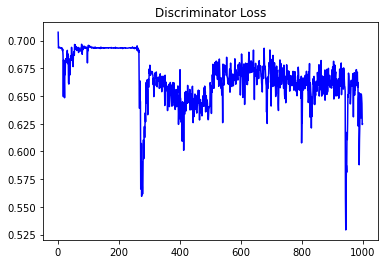

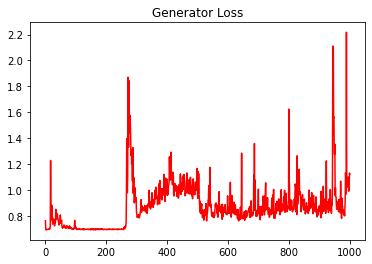

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.0987460000280823


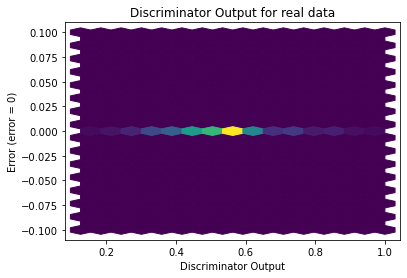

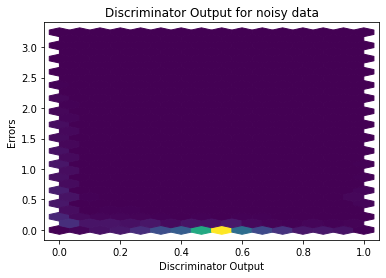

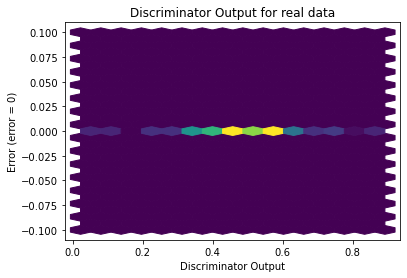

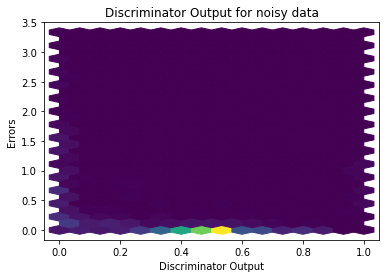

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

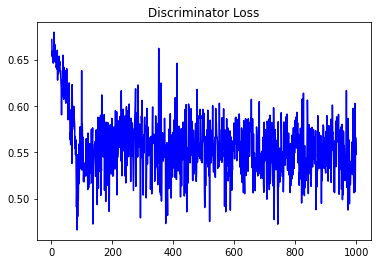

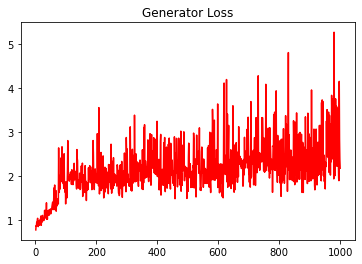

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.052409225969829346


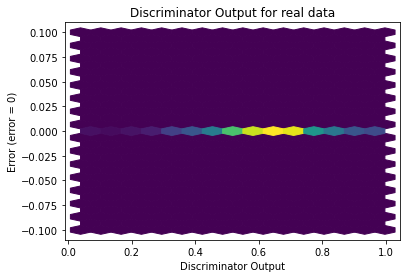

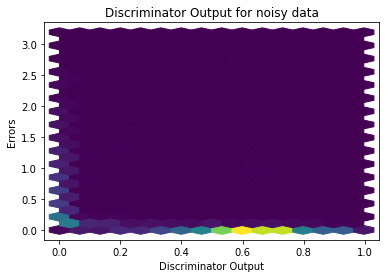

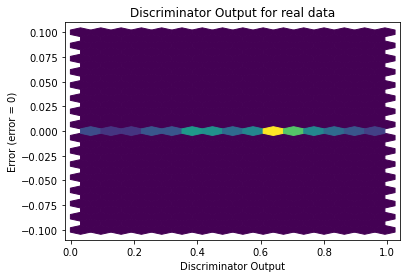

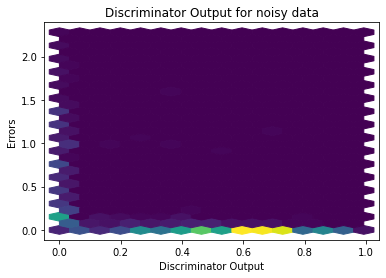

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


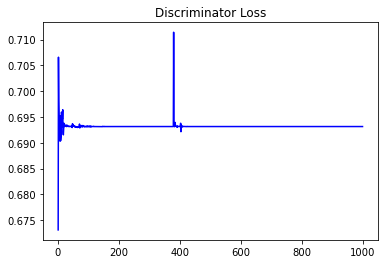

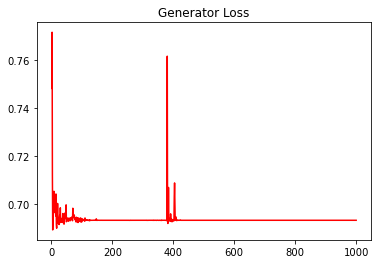

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.34754373903785435


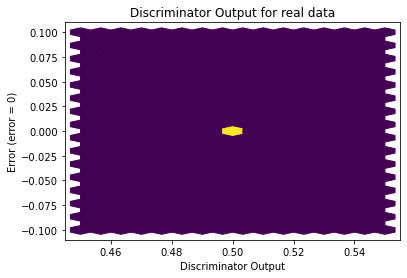

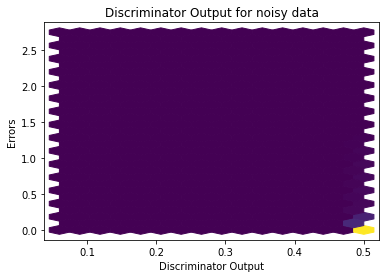

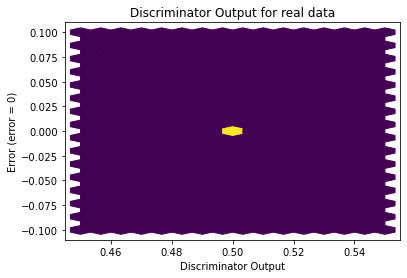

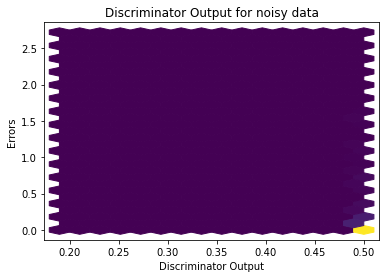

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


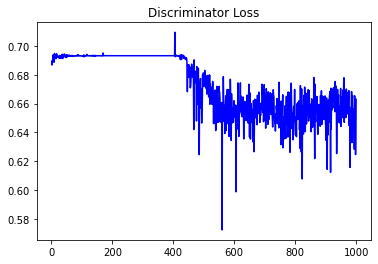

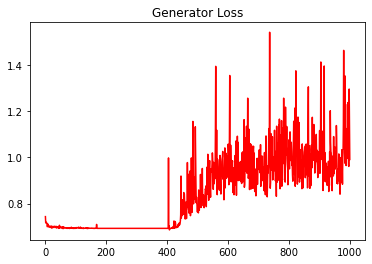

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.08971588689591978


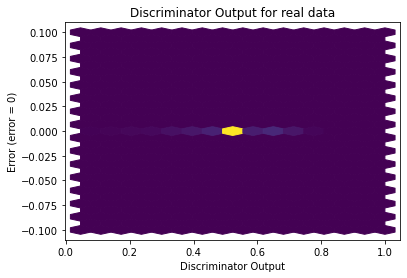

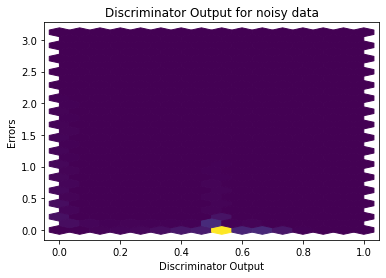

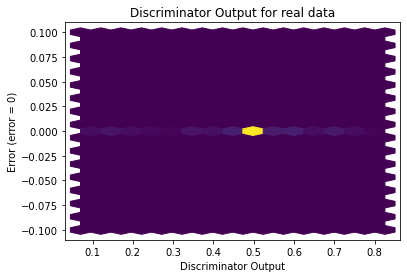

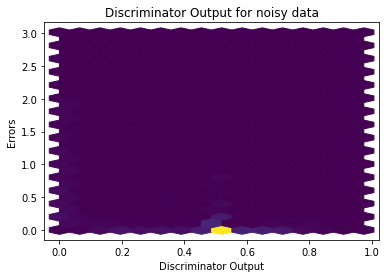

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3747]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2481]], requires_grad=True)
